In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [20]:
from tensorflow.keras.datasets import imdb
#or
#df = pd.read_csv("IMDB.csv")

In [21]:
#loading data
from tensorflow.keras.preprocessing.sequence import pad_sequences
(X_train, y_train),(X_test,y_test)= imdb.load_data(num_words = 10000)

In [22]:
#preprocess data
X_train = pad_sequences(X_train, maxlen = 200)
X_test = pad_sequences(X_test, maxlen = 200)

In [32]:
#building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

num_words = 10000
max_len = 200

model = Sequential([
    Embedding(num_words, 32, input_length = max_len),
    Flatten(), #basically used to convert multi D into 1D
    Dense(32,activation ='relu', name = 'hidden_layer_2'),
    Dense(16,activation ='relu', name = 'hidden_layer_3'),
    Dense(1,name='Output_layer')

  ])

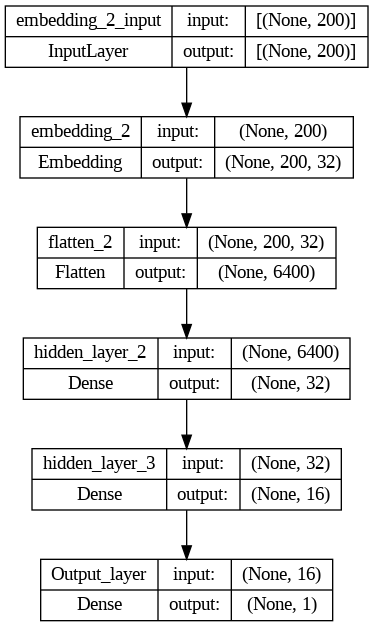

In [33]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [35]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           320000    
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                204832    
                                                                 
 hidden_layer_3 (Dense)      (None, 16)                528       
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 525377 (2.00 MB)
Trainable params: 525377 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [43]:
 history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512 )

Epoch 1/20
35/35 [==============================] - 3s 45ms/step - loss: 1.0187 - accuracy: 0.5267 - val_loss: 0.6661 - val_accuracy: 0.6088
Epoch 2/20
35/35 [==============================] - 1s 37ms/step - loss: 0.6156 - accuracy: 0.7152 - val_loss: 0.5948 - val_accuracy: 0.7184
Epoch 3/20
35/35 [==============================] - 1s 37ms/step - loss: 0.4766 - accuracy: 0.8244 - val_loss: 0.4353 - val_accuracy: 0.8108
Epoch 4/20
35/35 [==============================] - 1s 36ms/step - loss: 0.2760 - accuracy: 0.9008 - val_loss: 0.4273 - val_accuracy: 0.8599
Epoch 5/20
35/35 [==============================] - 1s 38ms/step - loss: 0.1708 - accuracy: 0.9425 - val_loss: 0.4673 - val_accuracy: 0.8664
Epoch 6/20
35/35 [==============================] - 1s 36ms/step - loss: 0.1054 - accuracy: 0.9726 - val_loss: 0.5446 - val_accuracy: 0.8733
Epoch 7/20
35/35 [==============================] - 1s 36ms/step - loss: 0.0609 - accuracy: 0.9890 - val_loss: 0.6315 - val_accuracy: 0.8721
Epoch 8/20
35

In [44]:
#Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy: ",accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.8669 - accuracy: 0.8579
Test loss: 0.8668955564498901
Test Accuracy:  0.8579199910163879


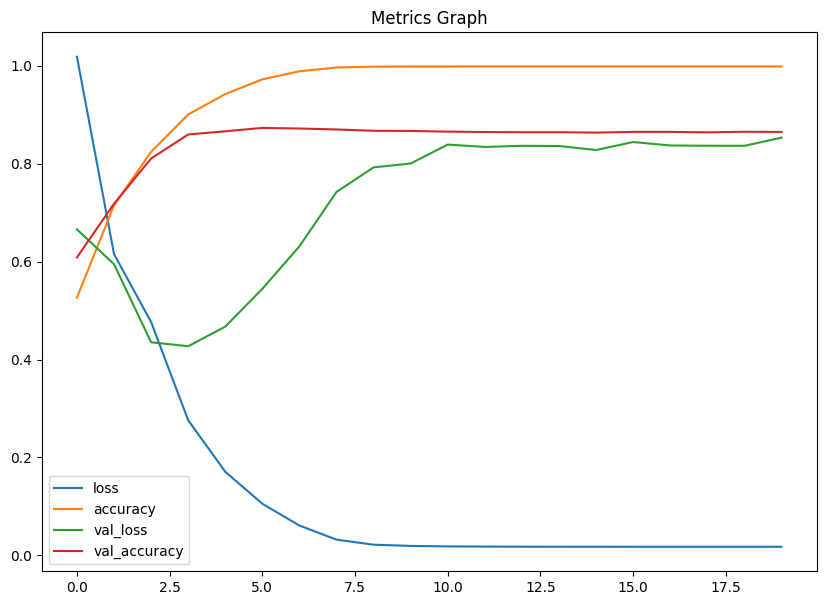

In [55]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [51]:
# Assuming `new_data` is a list containing new reviews
new_data = [
    "Terrible movie. I regret wasting my time watching it."
]

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=200)
# Tokenize and pad sequences for new data
new_sequences = tokenizer.texts_to_sequences(new_data)
new_sequences = pad_sequences(new_sequences, maxlen=200)

# Use the trained model to predict sentiment
predictions = model.predict(new_sequences)

# Decode predictions
labels = ['Negative', 'Positive']
for i, prediction in enumerate(predictions):
    label = labels[prediction.argmax()]
    print(f"Review: {new_data[i]}")
    print(f"Predicted sentiment: {label}")
    print()


1/1 [==============================] - 0s 30ms/step
Review: Terrible movie. I regret wasting my time watching it.
Predicted sentiment: Negative

